In [1]:
%load_ext nb_black
from IPython.display import SVG

## Using `xsmc` for arg inference

`xsmc` can estimate ancestral recombination graphs by a greedy "threading" operation. Consider the following example dataset consisting of 5 samples sequenced at 100kb:

In [2]:
import msprime as msp

sim = msp.simulate(
    sample_size=5,
    Ne=1e4,
    recombination_rate=1e-8,
    mutation_rate=1e-8,
    length=1e5,
    random_seed=1,
)

<IPython.core.display.Javascript object>

There are two trees represented in this tree sequence:

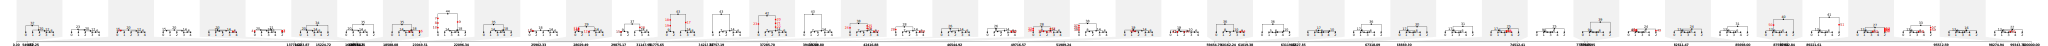

<IPython.core.display.Javascript object>

In [3]:
SVG(sim.draw_svg())

We will use the `XSMC.arg` method to estimate this tree sequence from data.

In [4]:
import xsmc

x = xsmc.XSMC(sim, theta=1e-4, rho_over_theta=1)
arg = x.arg(haps=[0])

<IPython.core.display.Javascript object>

The `x.arg()` function has one required argument, `haps`, which describes the haplotype(s) used to reconstruct the ARG. The return type is a tree sequence:

In [5]:
arg

<IPython.core.display.Javascript object>

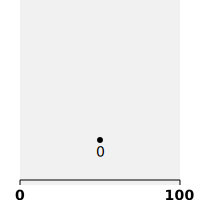

<IPython.core.display.Javascript object>

In [6]:
SVG(arg.draw_svg())

Since we only specificed a single `hap`, the return type is of course a trivial tree sequence. 

Note that the sequence length of the returned sequence lower than that of the input sequence. This is because `xsmc` uses binning to reduce computation time. The length of the returned sequence equals the number of bins:

In [7]:
sim.get_sequence_length() // x.w

100.0

<IPython.core.display.Javascript object>

The first non-trivial example would be to construct the tree sequence for haplotypes `0` and `1`:

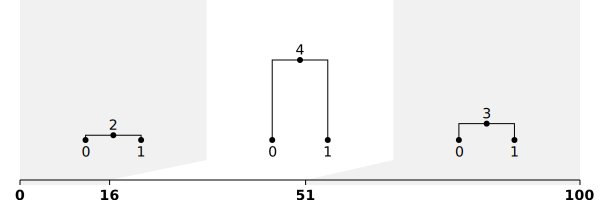

<IPython.core.display.Javascript object>

In [8]:
arg = x.arg(haps=[0, 1])
SVG(arg.draw_svg())

Again, not very exciting. How does it compare with the truth?

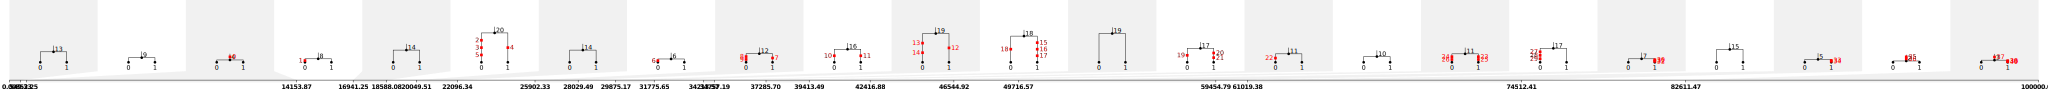

<IPython.core.display.Javascript object>

In [9]:
SVG(sim.simplify(samples=[0, 1]).draw_svg())

In general there will be a lot of invisible recombinations unless the mutation rate significantly exceeds the recombination rate.

Let's try with more haps:

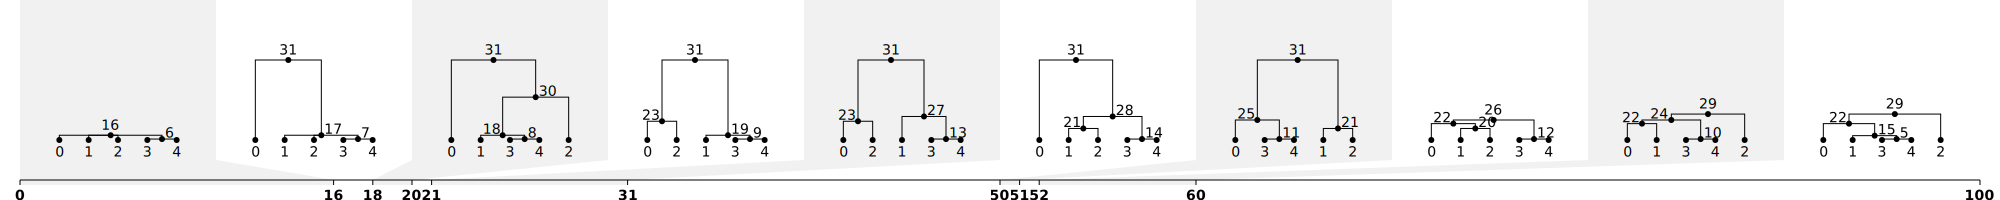

<IPython.core.display.Javascript object>

In [12]:
haps = [0, 1, 2, 3, 4]
SVG(x.arg(haps).draw_svg())

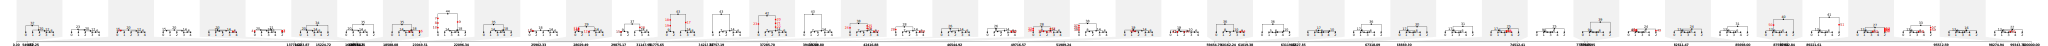

<IPython.core.display.Javascript object>

In [13]:
SVG(sim.simplify(samples=haps).draw_svg())

The different scales and large numbers of trees makes it somewhat difficult to compare the two tree sequences. Here is a function that will plot a restricted fraction of their overall range:

In [51]:
def rescale_ts(ts, a, b):
    "draw tree sequence from a to b, where a and b are expressed as a fraction of overall sequence length"
    assert 0 <= a < b < 1
    s = ts.get_sequence_length()
    left = a * s
    right = b * s
    ts1 = ts.keep_intervals([[left, right]], simplify=False)
    tbl = ts1.dump_tables()
    tbl.edges.reset()
    tbl.sequence_length = 1.0

    def t(x):
        return (x - left) / (right - left)

    for e in ts1.edges():
        tbl.edges.add_row(
            right=t(e.right), left=t(e.left), parent=e.parent, child=e.child
        )
    tbl.sites.reset()
    tbl.mutations.reset()
    return tbl.tree_sequence()

<IPython.core.display.Javascript object>

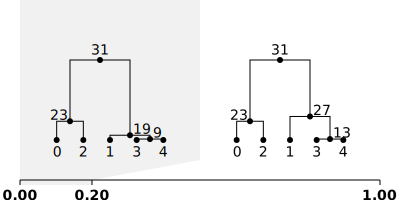

<IPython.core.display.Javascript object>

In [55]:
SVG(rescale_ts(x.arg(haps), 0.2, 0.25).draw_svg())

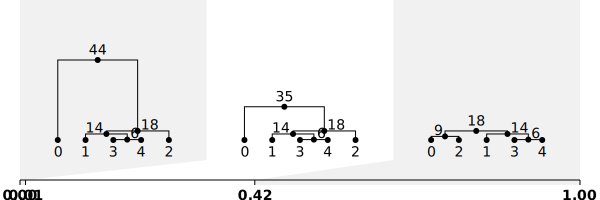

<IPython.core.display.Javascript object>

In [54]:
SVG(rescale_ts(sim.simplify(samples=haps), 0.2, 0.25).draw_svg())